# Дипломный проект

## Раздел 1. Введение

### Постановка задачи

Как и любой бизнес, компания «Мегафон» хочет повысить удовлетворённость своих клиентов качеством услуг. Это важная задача для удержания пользователей — как давних, так и недавно привлечённых. Ведь затраты на маркетинг и продвижение не оправдаются, если клиент уйдёт из-за низкого качества связи. Однако в реальном мире ресурсы всегда ограничены, и в единицу времени технический отдел может решить конечное количество задач. <br>
Чтобы делать это наиболее эффективно, важно определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов, и в первую очередь направить ресурсы на работу с ними. Для этого «Мегафон» провёл опрос своих клиентов, предложив им оценить уровень удовлетворённости качеством связи. По каждому клиенту, прошедшему опрос, были собраны технические показатели. <br>
Подготовьте исследование для компании «Мегафон» и проанализируйте, как зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. <br><br><br>

**Более подробно о проведённом опросе:**

В ходе опроса компания «Мегафон» предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую. Ниже вы можете ознакомиться с инфографикой по структуре опроса.<br>

*Обратите, пожалуйста, внимание, что для работы вам даны реальные данные, что может повлечь необходимость в дополнительной их обработке.*

![](https://sun9-32.userapi.com/C6vN5pHQW7hlseIt0AtTN7qNDQbDnHXdt1P2NA/ILntXqa-RrA.jpg)

### Codebook

`megafon.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

### Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Импорт данных и предварительная обработка

In [3]:
# Импорт датасета
df = pd.read_csv('./megafon.csv', index_col=0)
df.head()

Q1       Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                             
1        5      NaN          775.48846                     360.13   
2        5        4          861.96324                    3023.54   
3        1        4          261.11860                     790.96   
4        8        3          179.18564                    2590.97   
5        2  2, 3, 4          351.99208                     731.61   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
1                          86.56                                 3.93   
2                         411.18                                 1.27   
3                          34.20                                 1.79   
4                         325.88                                 0.80   
5                         223.54                                 1.15   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
1                                          1859.15   
2                                           667.47   
3                                          1079.60   
4                                          7053.81   
5                                          4550.38   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
1                                       2309   
2                                       2080   
3                                       6367   
4                                       3218   
5                                       1767   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
user_id                                                               
1                                   1007.82                       83  
2                                    255.36                      425  
3                                    535.85                      485  
4                                   1221.02                       51  
5                                   2336.56                       68

In [4]:
# Проверим данные датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3112 entries, 1 to 3112
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         3110 non-null   object 
 1   Q2                                         1315 non-null   object 
 2   Total Traffic(MB)                          3112 non-null   float64
 3   Downlink Throughput(Kbps)                  3112 non-null   float64
 4   Uplink Throughput(Kbps)                    3112 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 8   Web Page Download Throughput(Kbps)         3112 non-null   float64
 9   Web Average TCP RTT(ms)                    3112 non-null   int64  
dtypes: float64(6), int64(2), obje

*Как можно заметить тип данных Q1 - object, хотя опрос предусматпивает только численный ответ пользователя от 1 до 10. Также есть 2 записи с нулевым ответом Q1.*

In [5]:
# Проанализируем столбец Q1
df['Q1'].unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', nan, '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном с

In [6]:
# Посмотрим на записи датасета, в которых пользователь ответил неправильно на вопрос Q1
print(len(df[~df['Q1'].isin(list(str(x) for x in range(1, 11)))]))
df[~df['Q1'].isin(list(str(x) for x in range(1, 11)))]

54


Q1   Q2  \
user_id                                                           
32                                                      11  NaN   
81                                                    2, 9  NaN   
118                                                      0  NaN   
159                                                      0  NaN   
239                                                   1, 3  NaN   
246                                                     19  NaN   
352                                                     15  NaN   
372                                                    NaN  NaN   
460                                                   1, 6  NaN   
480                                                      0  NaN   
492                                           ***** ** ***  NaN   
678      3 - дер.Ширяево Волоколамского района, 9 - в М...  NaN   
686                                                  10, 9  NaN   
835      Чем даль ше,тем лучше.Спасибо за ваш труд.Оцен...  NaN   
898                                      ОЦЕНКА-3/НЕВАЖНО/  NaN   
981                                          Отвратительно  NaN   
1031                                                     0  NaN   
1117                                                     0  NaN   
1134                                                     0  NaN   
1152                                                     0  NaN   
1165                                                  1, 3  NaN   
1366                         Я ценой услуг не удовлетворен  NaN   
1379                                         Пока не понял  NaN   
1383                                                  3, 9  NaN   
1436                                                  5, 6  NaN   
1651                                               0, 1, 5  NaN   
1700                                                     0  NaN   
1719                                                  5, 7  NaN   
1726                                                    Hi  NaN   
1787     4. Тульская область Заокский район. Романовски...  NaN   
1798     Немагу дать атценку денги незашто снимаеть ско...  NaN   
1902                                                10, 50  NaN   
1924     Очень  хорошо. Обслуживания  я довольно. Спаси...  NaN   
1980                                                     ?  NaN   
1992                                                     0  NaN   
2011                                                Поохое  NaN   
2037     Когда в Москве-10 а когда в калужской области ...  NaN   
2146                                                   Нет  NaN   
2228                                                   Нет  NaN   
2289                                                    Да  NaN   
2305                                                Ужасно  NaN   
2457                                                    Да  NaN   
2571     3 тройка, связь отвратительная, жалко платить ...  NaN   
2615                                                     0  NaN   
2617                                                  5, 6  NaN   
2715                                         Чдтчдтччдтччч  NaN   
2759                                                  3, 7  NaN   
2855                                       20, 89031081392  NaN   
2873                                                  1, 8  NaN   
2882                                                 Без з  NaN   
2973                                                 10, 5  NaN   
3014                                                  2, 5  NaN   
3027                                                   NaN  NaN   
3042     Я в Смол. Области живу сейчас, не пользуюсь те...  NaN   

         Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                 
32               375.23606                    5980.48   
81               567.03467                    1049.72   
118              837.55274                    2511.24   
159              1

*Так как таких записей немного (~ 1,74 %) и во всех этих записях ответа на Q2 нет, что усложняет дальнейший анализ, мы можем отбросить эти данные и перевести данные по этому столбцу в тип int*

In [7]:
df = df[df['Q1'].isin(list(str(x) for x in range(1, 11)))]
df['Q1'] = df['Q1'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3058 entries, 1 to 3112
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         3058 non-null   int32  
 1   Q2                                         1315 non-null   object 
 2   Total Traffic(MB)                          3058 non-null   float64
 3   Downlink Throughput(Kbps)                  3058 non-null   float64
 4   Uplink Throughput(Kbps)                    3058 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        3058 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  3058 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        3058 non-null   int64  
 8   Web Page Download Throughput(Kbps)         3058 non-null   float64
 9   Web Average TCP RTT(ms)                    3058 non-null   int64  
dtypes: float64(6), int32(1), int6

In [8]:
# Проанализируем столбец Q2
df['Q2'].unique()

array([nan, '4', '3', '2, 3, 4', '4, 5', '1, 3, 4', '1, 3, 4, 5', '1, 3',
       '3, 4', '1, 2', '3, 5', '1', '7', '1, 4', '1, 2, 3, 4, 5', '2, 3',
       '1, 2, 3, 4', '2, 3, 4, 5', '3, 4, 5', '1, 2, 5', '1, 5',
       '1, 2, 4', '6', '1, 4, 5', '1, 2, 3', '2, 5', '2, 4, 5', '1, 2, 7',
       '5', '2', '1, 2, 3, 4, 5, 6', '0, 1, 7', '4, 7', '1, 4, 7', '0, 3',
       '1, 3, 4, 5, 7', '3, 7', '1, 3, 4, 7', '3, 4, 5, 7', '2, 4',
       '5, 6', '1, 2, 3, 5', '1, 3, 5', '1, 2, 34', '1, 2, 4, 5',
       '0, 05, 2, 27, 7', '1, 3, 7', '3, 4, 7', '1, 2, 3, 4, 7', '10',
       '0', '1, 2, 3, 7'], dtype=object)

*Все ответы численные, перечисленные через запятую или nan.*

In [9]:
# Разобьем записи в списки. Уберем все неправильные ответы. Заменим NaN на None
def my_func(x):
    if x != np.NaN:
        x = list(str(x).split(', ')) # разбиваем строку
        x = list(filter(lambda x: True if x in ['1', '2', '3', '4', '5', '6', '7'] else False, x)) # фильтруем данные
        if len(x) == 0:
            return None
        # elif len(x) == 1:
        #     return int(x[0])
        else:
            return [int(x) for x in x] # возвращаем списки с данными в формате int
    else:
        return None

# применяем функцию
df['Q2'] = df['Q2'].apply(my_func)

df.sample(5)

Q1    Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                           
1083      9  None          320.63366                     716.84   
558      10  None          171.64939                     553.57   
1071      2  None          159.30774                    3226.16   
959      10  None          231.29143                     373.04   
394       6   [4]          787.03032                    1191.26   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
1083                      142.81                                 2.41   
558                       358.58                                 5.18   
1071                      133.76                                 2.08   
959                       116.63                                 1.47   
394                        47.56                                 0.99   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
1083                                       2646.57   
558                                        9383.27   
1071                                      17190.02   
959                                        2480.83   
394                                        3849.25   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
1083                                    2392   
558                                     1035   
1071                                    1082   
959                                     1585   
394                                     2463   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
user_id                                                               
1083                                 826.28                       88  
558                                 2841.40                       71  
1071                                 812.62                      345  
959                                 1192.43                      198  
394                                 1512.39                      208

In [10]:
# Посмотрим как часто пользователь отвечал на первый вопрос 1-8, а на второй вопрос не отвечал
len(df[(~df['Q1'].isin([9, 10])) & (df['Q2'].isna())])

661

*661 раза пользователь не отвечал на второй вопрос. Это большое количество ответов. Заменим данные ответы на цифру 8, чтобы иметь возможность дальнейшего анализа данных случаев*

In [11]:
df.loc[(~df['Q1'].isin([9, 10])) & (df['Q2'].isna()), 'Q2'] = 8
len(df[(~df['Q1'].isin([9, 10])) & (df['Q2'].isna())]) # проверим что всё получилось

0

*В данный момент столбец Q2 содержит один или несколько вариантов ответов. Для более удобного анализа данных перекодируем этот признак*

In [12]:
# Извлечем все варианты ответов в разные столбцы
temp = df['Q2'].explode().reset_index()
temp = pd.crosstab(temp['user_id'], temp['Q2'])
temp.columns = ['q2_' + str(column) for column in temp.columns] # переименнуем столбцы чтобы понимать, что это ответы на вопрос Q2
temp.head()

q2_1  q2_2  q2_3  q2_4  q2_5  q2_6  q2_7  q2_8
user_id                                                
1           0     0     0     0     0     0     0     1
2           0     0     0     1     0     0     0     0
3           0     0     0     1     0     0     0     0
4           0     0     1     0     0     0     0     0
5           0     1     1     1     0     0     0     0

In [13]:
# Добавим в основной датасет
df = pd.merge(df, temp, left_index=True, right_index=True, how='left')
df.head(5)

Q1         Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                                
1         5          8          775.48846                     360.13   
2         5        [4]          861.96324                    3023.54   
3         1        [4]          261.11860                     790.96   
4         8        [3]          179.18564                    2590.97   
5         2  [2, 3, 4]          351.99208                     731.61   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
1                          86.56                                 3.93   
2                         411.18                                 1.27   
3                          34.20                                 1.79   
4                         325.88                                 0.80   
5                         223.54                                 1.15   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
1                                          1859.15   
2                                           667.47   
3                                          1079.60   
4                                          7053.81   
5                                          4550.38   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
1                                       2309   
2                                       2080   
3                                       6367   
4                                       3218   
5                                       1767   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  q2_1  \
user_id                                                                      
1                                   1007.82                       83   0.0   
2                                    255.36                      425   0.0   
3                                    535.85                      485   0.0   
4                                   1221.02                       51   0.0   
5                                   2336.56                       68   0.0   

         q2_2  q2_3  q2_4  q2_5  q2_6  q2_7  q2_8  
user_id                                            
1         0.0   0.0   0.0   0.0   0.0   0.0   1.0  
2         0.0   0.0   1.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   1.0   0.0   0.0   0.0   0.0  
4         0.0   1.0   0.0   0.0   0.0   0.0   0.0  
5         1.0   1.0   1.0   0.0   0.0   0.0   0.0

In [14]:
# Заполним NaN значения нулями
df.fillna(0, inplace=True)

# И изменим формат данных
df[df.columns[10:]] = df[df.columns[10:]].astype('int')
df.sample(5)

Q1      Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                             
2971     10       0          431.68743                     362.86   
1904     10       0          531.21237                   20503.00   
13        1       8          828.47641                    2171.11   
2157     10       0          511.31471                    1121.56   
872       5  [1, 3]          716.02075                     820.26   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
2971                      171.53                                 0.39   
1904                      152.57                                 0.16   
13                         46.16                                 8.49   
2157                      173.61                                 1.00   
872                       201.06                                 1.47   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
2971                                       1227.84   
1904                                      28749.60   
13                                         2483.79   
2157                                       3603.14   
872                                        2785.53   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
2971                                    1883   
1904                                     828   
13                                      2504   
2157                                    2117   
872                                     1862   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  q2_1  \
user_id                                                                      
2971                                2185.85                      128     0   
1904                               10118.24                       66     0   
13                                  1923.60                      112     0   
2157                                1829.61                       90     0   
872                                 2745.58                      128     1   

         q2_2  q2_3  q2_4  q2_5  q2_6  q2_7  q2_8  
user_id                                            
2971        0     0     0     0     0     0     0  
1904        0     0     0     0     0     0     0  
13          0     0     0     0     0     0     1  
2157        0     0     0     0     0     0     0  
872         0     1     0     0     0     0     0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3058 entries, 1 to 3112
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         3058 non-null   int32  
 1   Q2                                         3058 non-null   object 
 2   Total Traffic(MB)                          3058 non-null   float64
 3   Downlink Throughput(Kbps)                  3058 non-null   float64
 4   Uplink Throughput(Kbps)                    3058 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        3058 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  3058 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        3058 non-null   int64  
 8   Web Page Download Throughput(Kbps)         3058 non-null   float64
 9   Web Average TCP RTT(ms)                    3058 non-null   int64  
 10  q2_1                         

*Датасет готов к дальнейшему анализу*

## Раздел 2. Исследование зависимости оценки качества связи клентом (ответа на первый вопрос опроса) от технических показателей

### 2.1 Постановка задачи
Первый вопрос опроса определял уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Таким образом ответ на первый вопрос должен зависить от одного или нескольких технических показателей. Проведем разведочный анализ данных для того, чтобы выяснить, от каких технических показателей зависит ответ на первый вопрос и зависит ли.

### 2.2 Разведочный анализ данных

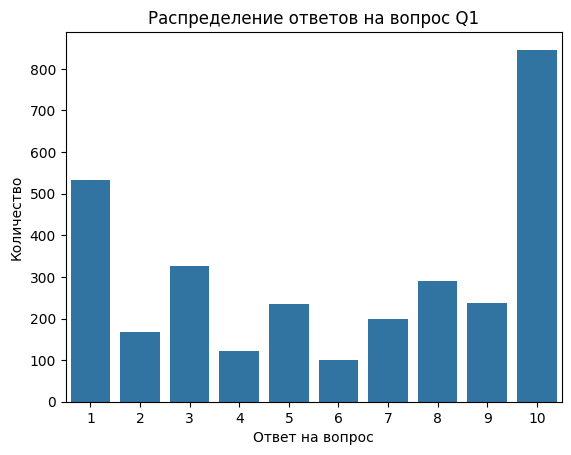

In [16]:
# Проанализируем распределение ответов на вопрос Q1
sns.countplot(df, x='Q1')
plt.title('Распределение ответов на вопрос Q1')
plt.ylabel('Количество')
plt.xlabel('Ответ на вопрос')
plt.show()

*Распределение ответов на первый вопрос неравномерное. Люди склонны выбирать крайние значения*

In [17]:
# Посмотрим на долю удовлетворенных клиентов, относительно всех
len(df[df['Q1'].isin([9, 10])]) / len(df)

0.3544800523217789

*Доля довольных клиентов - 35 %*

In [18]:
# Сохраним для удобства названия технических показателей в отдельный список
feature_columns = df.columns[2:10]

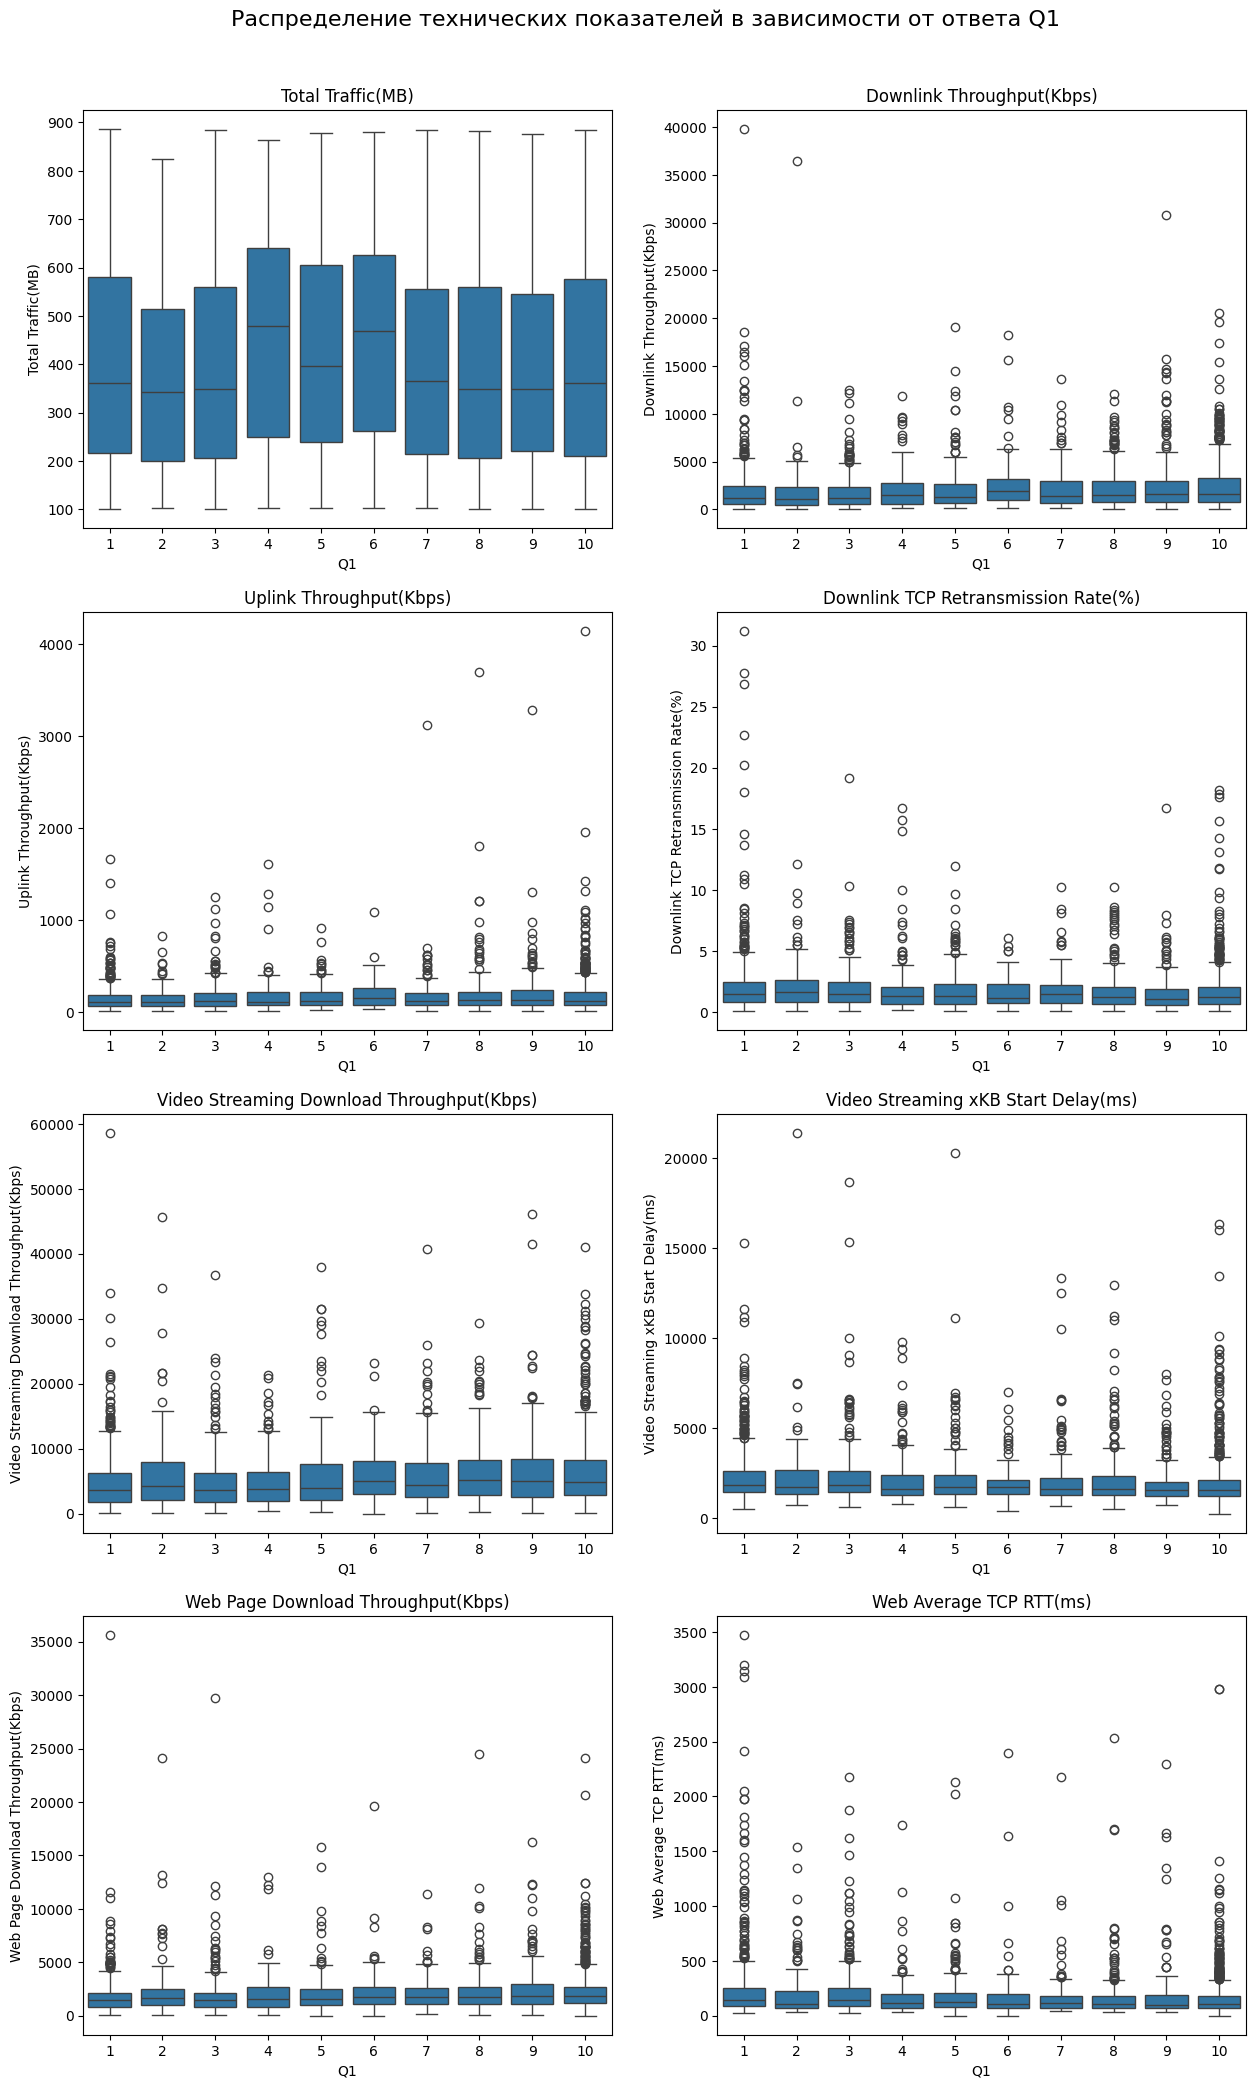

In [19]:
# Построим боксплоты для каждого технического показателя в зависимости от ответов Q1
fig, axes = plt.subplots(4, 2, figsize=(15,25))
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.boxplot(df, x='Q1', y=col, ax=axes[i])
    axes[i].set_title(f'{col}')
fig.suptitle('Распределение технических показателей в зависимости от ответа Q1', fontsize=16, y=0.92)
plt.show()

*По графику зависимость ответа от показателя Total Traffic(MB) не выявлена. В данных по остальным параметрам присутствует очень много выбросов, что усложняет анализ. Сравним медианные значения технических показателей. Медианные значения позволят исключить влияние выбросов*

In [20]:
# Создадим временный датасет с медианными значениями
temp = df.groupby('Q1')[feature_columns].median()
temp

Total Traffic(MB)  Downlink Throughput(Kbps)  Uplink Throughput(Kbps)  \
Q1                                                                          
1          360.236045                   1164.150                  107.345   
2          342.330545                   1076.525                  105.915   
3          348.214760                   1140.210                  122.720   
4          479.033630                   1481.070                  109.700   
5          395.779250                   1273.570                  122.360   
6          468.404990                   1902.360                  147.410   
7          364.198315                   1410.815                  116.605   
8          347.870240                   1457.390                  125.070   
9          347.913500                   1653.080                  126.910   
10         360.035510                   1637.000                  123.975   

    Downlink TCP Retransmission Rate(%)  \
Q1                                        
1                                 1.440   
2                                 1.620   
3                                 1.460   
4                                 1.320   
5                                 1.285   
6                                 1.150   
7                                 1.450   
8                                 1.220   
9                                 1.090   
10                                1.225   

    Video Streaming Download Throughput(Kbps)  \
Q1                                              
1                                    3607.445   
2                                    4191.815   
3                                    3688.170   
4                                    3736.210   
5                                    3891.130   
6                                    5048.530   
7                                    4420.135   
8                                    5084.890   
9                                    4974.810   
10                                   4917.520   

    Video Streaming xKB Start Delay(ms)  Web Page Download Throughput(Kbps)  \
Q1                                                                            
1                                1809.0                            1442.720   
2                                1737.0                            1618.720   
3                                1848.0                            1508.640   
4                                1623.0                            1557.060   
5                                1724.0                            1563.275   
6                                1688.0                            1745.610   
7                                1623.5                            1765.130   
8                                1616.0                            1769.810   
9                                1531.0                            1856.230   
10                               1553.5                            1847.130   

    Web Average TCP RTT(ms)  
Q1                           
1                     139.0  
2                     105.5  
3                     144.0  
4                     112.0  
5                     125.0  
6                     110.0  
7                     119.5  
8                     108.0  
9                     100.0  
10                    106.0

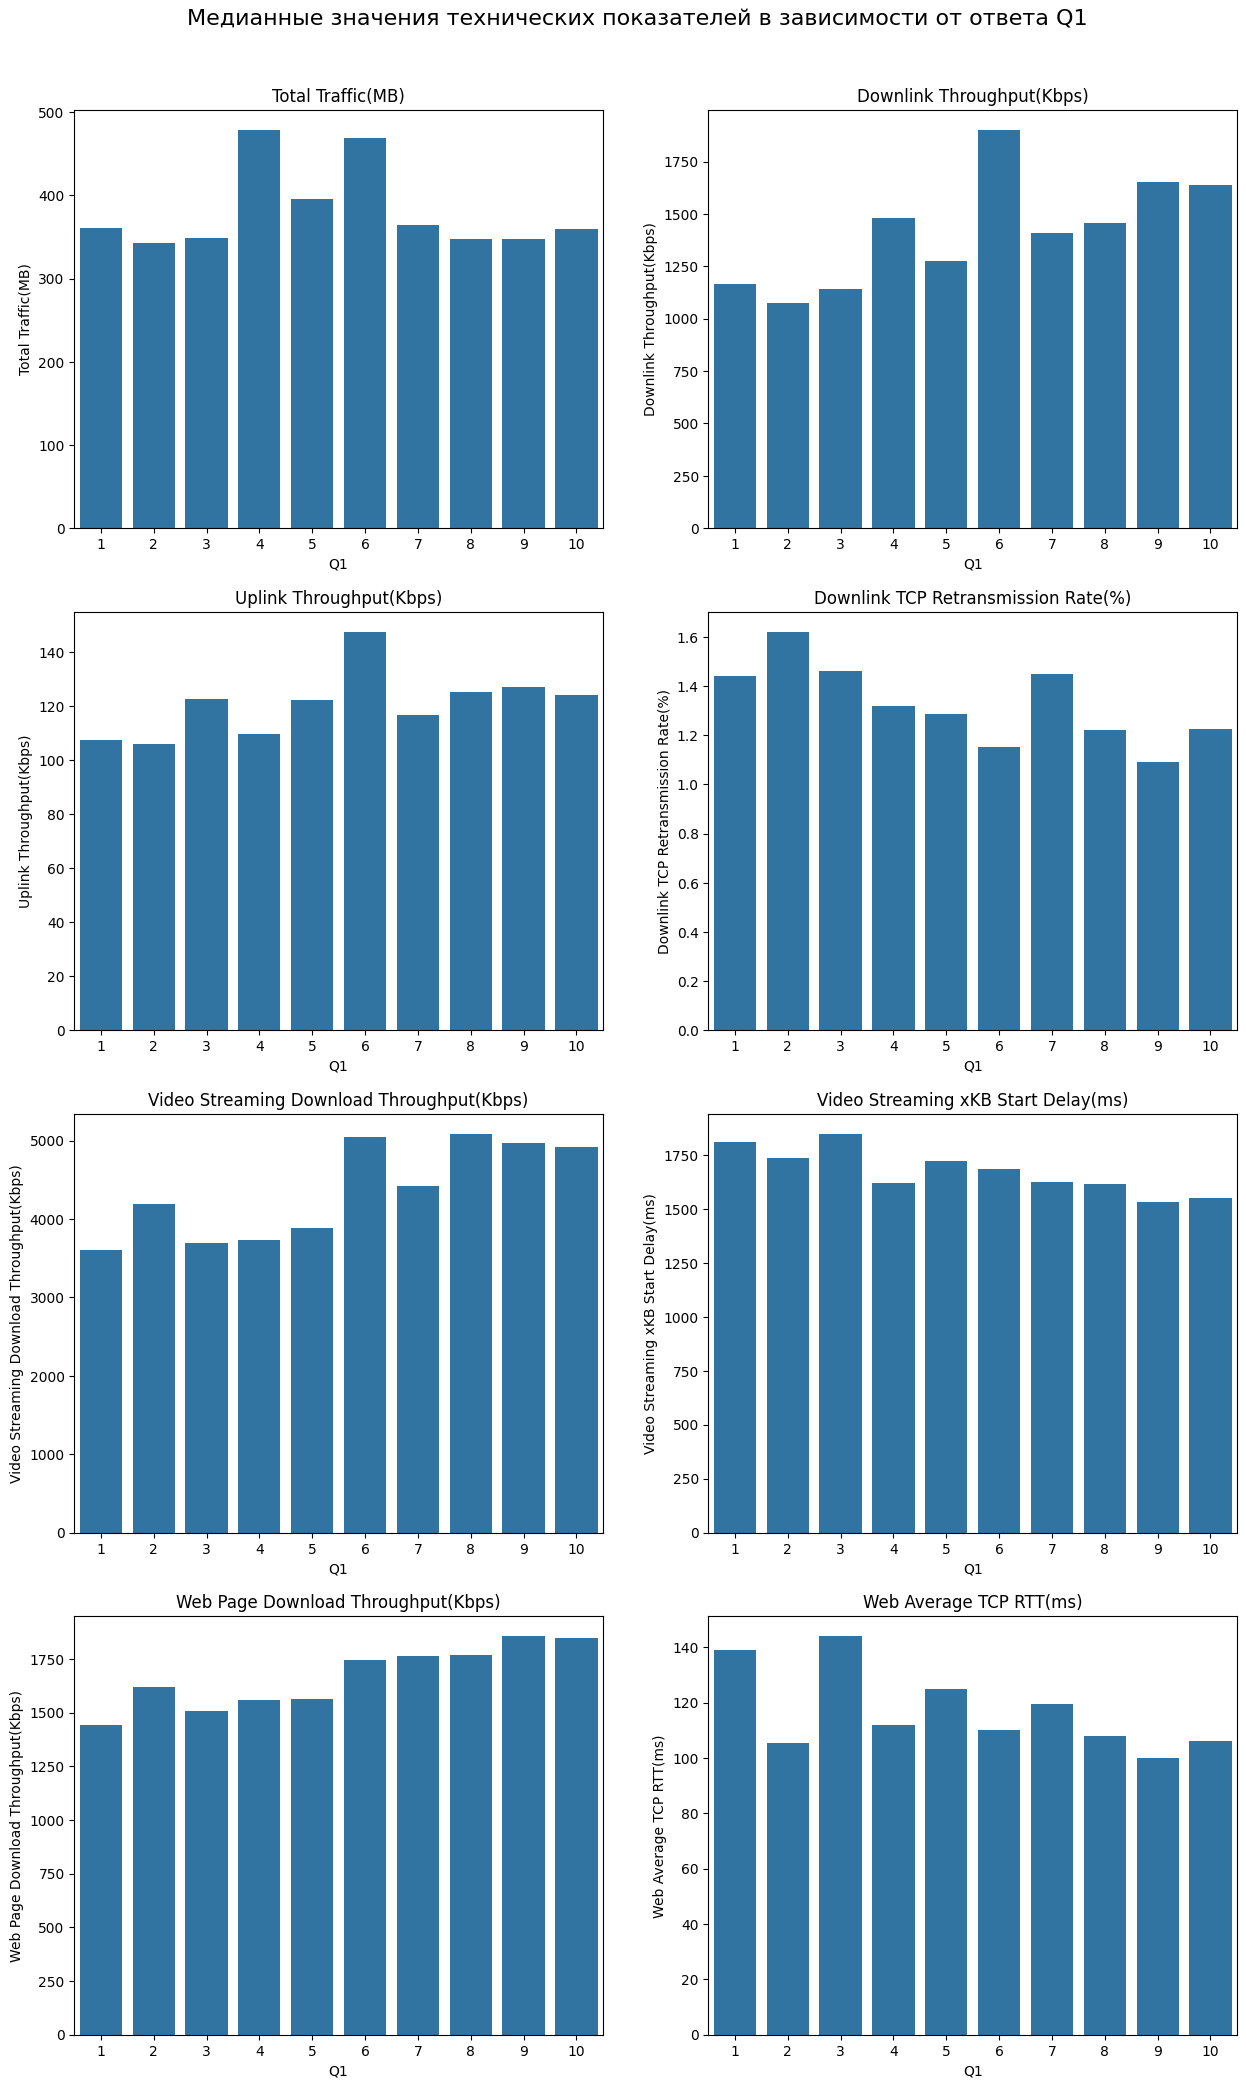

In [21]:
# Построим графики
fig, axes = plt.subplots(4, 2, figsize=(15,25))
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.barplot(temp, x=temp.index, y=col, ax=axes[i])
    axes[i].set_title(f'{col}')
fig.suptitle('Медианные значения технических показателей в зависимости от ответа Q1', fontsize=16, y=0.92)
plt.show()

*Из графиков видно зависимость медианного значения технических параметров от оценки клиентом качества связи Q1. Но анализировать 10 групп клиентов сложно, поэтому разделим клиентов на 3 примерно равные группы:*
* клиенты с низкой оценкой Q1 (1 - 3);
* клиенты со средней оценкой Q1 (4 - 7);
* клиенты с высокой оценкой Q1 (9, 10).

In [22]:
# Присвоим каждому клиенту значение group в зависимости от Q1: low - низкие оценки 1, 2, 3; medium - средние оценки 4 - 8; high - высокие оценки 9 и 10
group_dict = {
    1: 'low',
    2: 'low',
    3: 'low',
    4: 'medium',
    5: 'medium',
    6: 'medium',
    7: 'medium',
    8: 'medium',
    9: 'high',
    10: 'high',
     }

df['group'] = df['Q1'].apply(lambda x: group_dict[x])

In [23]:
# Посмотрим количество клиентов в каждой из групп
df['group'].value_counts()

group
high      1084
low       1025
medium     949
Name: count, dtype: int64

*В каждой группе получилось примерно одинаковое количество клиентов - около 1000*

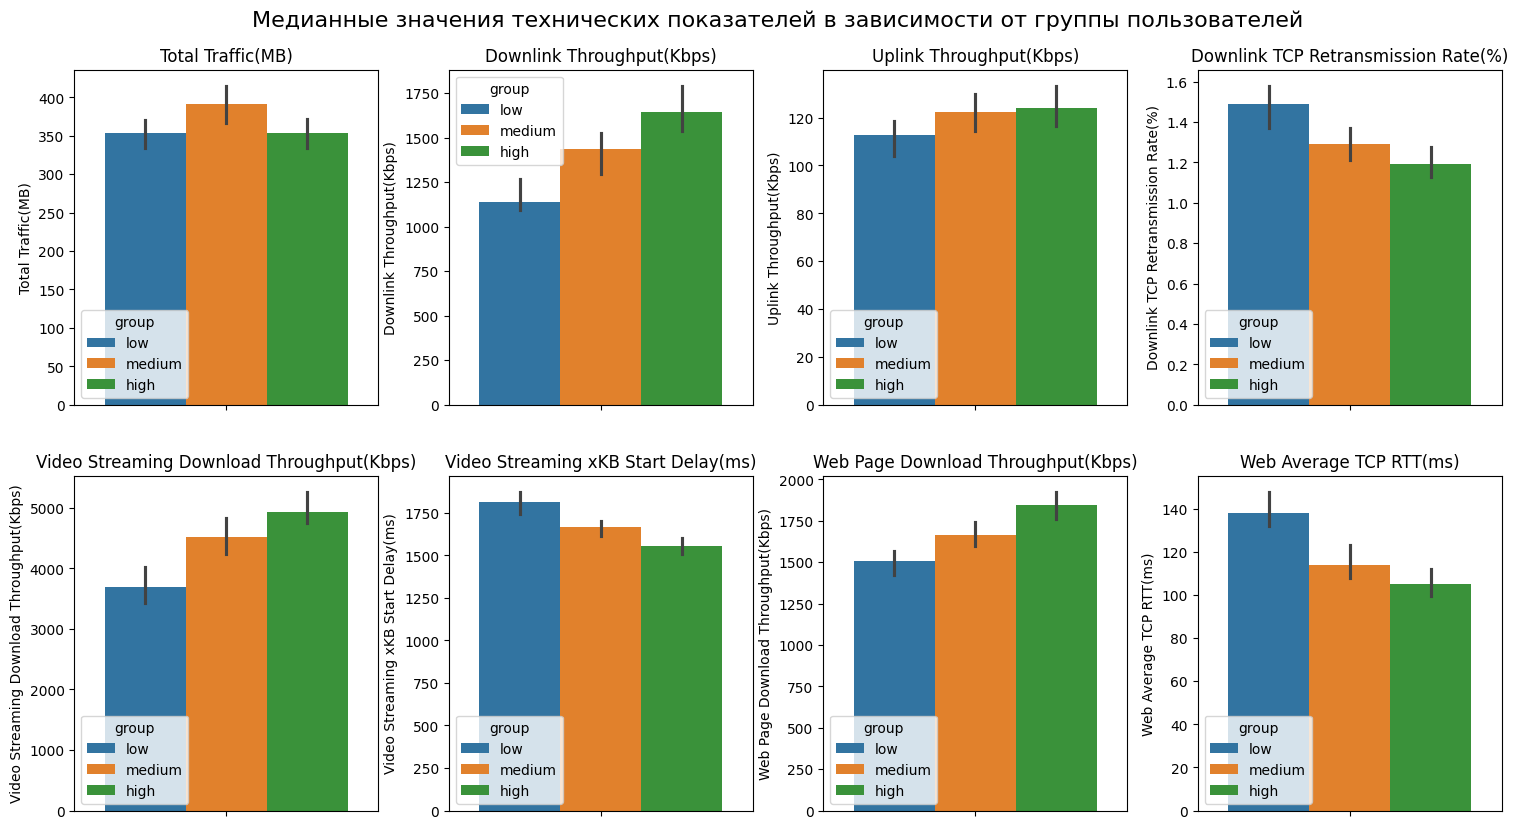

In [24]:
# Построим графики
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.tight_layout(w_pad=2, h_pad=3)
axes = axes.flatten()

hue_order = ['low', 'medium', 'high']

for i, col in enumerate(feature_columns):
    sns.barplot(df, y=col, ax=axes[i], hue='group',
                hue_order=hue_order, estimator='median')
    axes[i].set_title(f'{col}')
fig.suptitle(
    'Медианные значения технических показателей в зависимости от группы пользователей', fontsize=16, y=1.05)
plt.show()

*Анализ графических данных позволяет предположить, что ответ на вопрос Q1 зависит от показателей:*
* *Downlink Throughput(Kbps), Video Streaming Download Throughput(Kbps), Web Page Download Throughput(Kbps) - (с увеличением оценки связи увеличивается медианное значение параметра)*
* *Uplink Throughput(Kbps) - (с увеличением оценки связи увеличивается медианное значение параметра в меньшей степени)*
* *Downlink TCP Retransmission Rate(%), Web Average TCP RTT(ms) - (с увеличением оценки связи уменьшается медианное значение параметра)*
* *Video Streaming xKB Start Delay(ms) - (с увеличением оценки связи уменьшается медианное значение параметра в меньшей степени)*

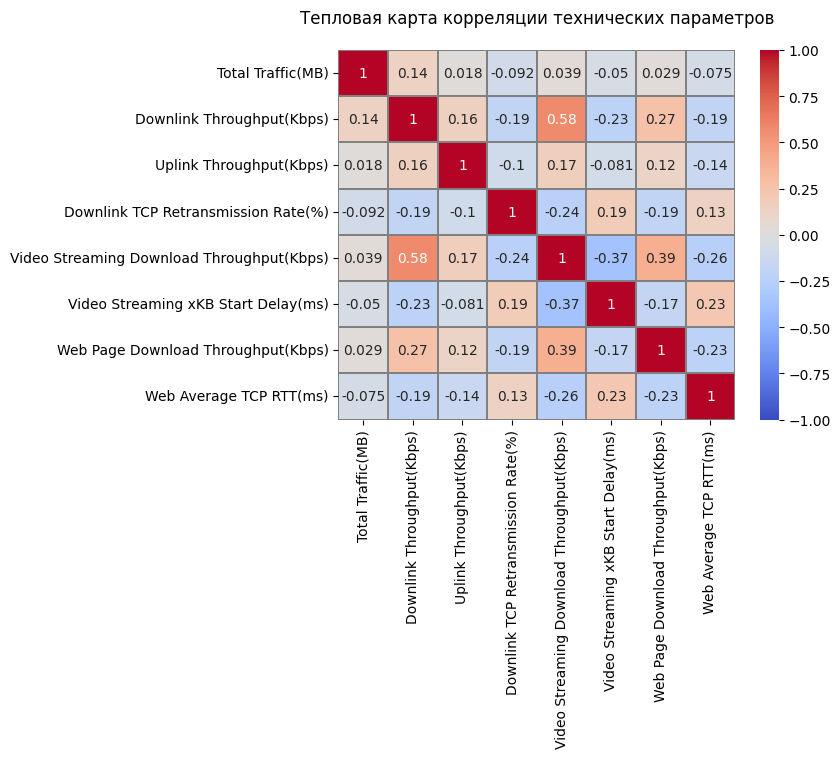

In [25]:
# Проверим корреляцию технических параметров
sns.heatmap(df[feature_columns].corr(), 
            annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=.2, linecolor='grey')
plt.title('Тепловая карта корреляции технических параметров', y=1.05)
plt.show()

*Наблюдаются следующие корреляции:*  
* Между Video Streaming Download Throughput и Downlink Throughput - значительная положительная корреляция (0,58);  
* Между Video Streaming Download Throughput и Web Page Download Throughput - умеренная положительная корреляция (0,39);  
* Между Video Streaming Download Throughput и Video Streaming xKB Start Delay - умеренная отрицательная корреляция (-0,37).

Также есть слабые и незначительные корреляции между некоторыми остальными техническими параметрами (< 0,3).

#### Вывод
Разведочный анализ данных позволяет предположить, что:
* Параметр Total Traffic(MB) не влияет на оценку связи;
* Downlink Throughput(Kbps), Video Streaming Download Throughput(Kbps), Web Page Download Throughput(Kbps) положительно влияют на оценку связи;
* Uplink Throughput(Kbps) положительно влияют на оценку связи в меньшей степени;
* Downlink TCP Retransmission Rate(%), Web Average TCP RTT(ms) отрицательно влияют на оценку связи;
* Video Streaming xKB Start Delay(ms) отрицательно влияют на оценку связи в меньшей степени.

### 2.3 Статистическая проверка зависимости

Для статистической проверки зависимости ответа на первый вопрос опроса от технических параметров будем использовать метод бутстрапа. Мы разделим клиентов на две группы: тех, кто поставил высокие оценки на вопрос Q1 (9 и 10), и тех, кто поставил низкие оценки (1, 2 и 3). Затем мы сравним медианные значения технических показателей этих групп и статистически проверим значимость разницы. Метод бутстрапа прост и позволяет быстро и эффективно определить статистическую значимость данных.

Составим нулевую гипотезу:  
**H0 - оценка клиентом качества связи Q1 не зависит от технического параметра Downlink Throughput**  

И соответствующую ей правостороннюю альтернативную гипотезу:  
**H1 - чем выше оценка клиентом качества связи Q1, тем выше технический параметр Downlink Throughput**


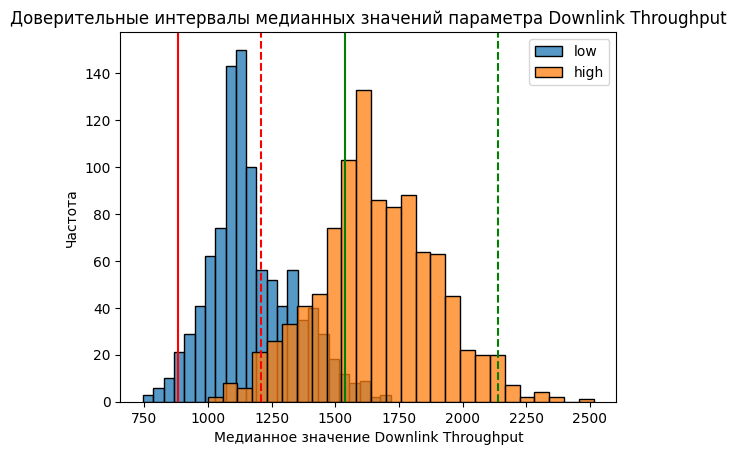

In [26]:
# Построим бустрап распределение двух групп и посмотрим пересечение доверительных интервалов
def bootstrap_generator(data, n=100, N_TRIAL=1000, func=np.median):
    ''' data: датафрейм, parameter: исследуемый столбец, p: установленная степень значимости'''
    res = []
    n = min(len(data), n)
    for _ in range(N_TRIAL):
        subsample = random.choices(data.to_list(), k=n)
        stat = np.median(subsample)
        res.append(stat)
    return res

sample_a = bootstrap_generator(df.query('group == "low"')['Downlink Throughput(Kbps)'])
sample_b = bootstrap_generator(df.query('group == "high"')['Downlink Throughput(Kbps)'])

sns.histplot(sample_a, label='low')
sns.histplot(sample_b, label='high')
plt.axvline(np.percentile(sample_a, 2.5), linestyle='-', color='r')
plt.axvline(np.percentile(sample_a, 97.5), linestyle='-', color='g')
plt.axvline(np.percentile(sample_b, 2.5), linestyle='--', color='r')
plt.axvline(np.percentile(sample_b, 97.5), linestyle='--', color='g')
plt.title('Доверительные интервалы медианных значений параметра Downlink Throughput')
plt.xlabel('Медианное значение Downlink Throughput')
plt.ylabel('Частота')
plt.legend()
plt.show()

*Доверительные интервалы пересекаются, для дальнейшей оценки рассчитаем с помощью метода бустрап значение p-value*

In [27]:
# Напишем функцию, позволяющую быстро применять метод бутстрапа к разным столбцам
def bootstrap(data, parameter, p=0.05):
    ''' data: датафрейм, parameter: исследуемый столбец, p: установленная степень значимости'''

    low_rating = data[data['Q1'].isin([1, 2, 3])][parameter]
    high_rating = data[data['Q1'].isin([9, 10])][parameter]
    diff = high_rating.median() - low_rating.median()

    if diff < 0: # определяем правосторонняя или левосторонняя альтернативная гипотеза
        low_rating, high_rating = high_rating, low_rating
        diff = high_rating.median() - low_rating.median()

    k = len(low_rating)
    l = len(high_rating)
    n = 1500
    random.seed(13)
    differences = np.zeros(n)
    for i in range(n):
        s1 = random.choices(low_rating.tolist(), k=k)
        s2 = random.choices(high_rating.tolist(), k=l)
        p1 = np.median(s1)
        p2 = np.median(s2)
        differences[i] = p2 - p1
    differences_cent = differences - np.mean(differences)
    p_value = sum(differences_cent >= diff) / n

    print('------------------------------')
    print(f'Разница в медианных значениях {parameter} при разных значениях Q1 равна {round(diff, 3)}')
    print(f'P_value: {p_value}')
    if p_value <= p:
        print('Нулевую гипотезу при заданной степени значимости можно отвергнуть.')
        print('Различия статистически значимы!')
    else:
        print('Нулевую гипотезу при заданной степени значимости отвергнать нельзя.')
        print('Различия статистически НЕ значимы!')
    return differences_cent, diff

In [28]:
# Применим функцию к столбцу
differences_cent, diff = bootstrap(df, 'Downlink Throughput(Kbps)')

------------------------------
Разница в медианных значениях Downlink Throughput(Kbps) при разных значениях Q1 равна 501.15
P_value: 0.0
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!


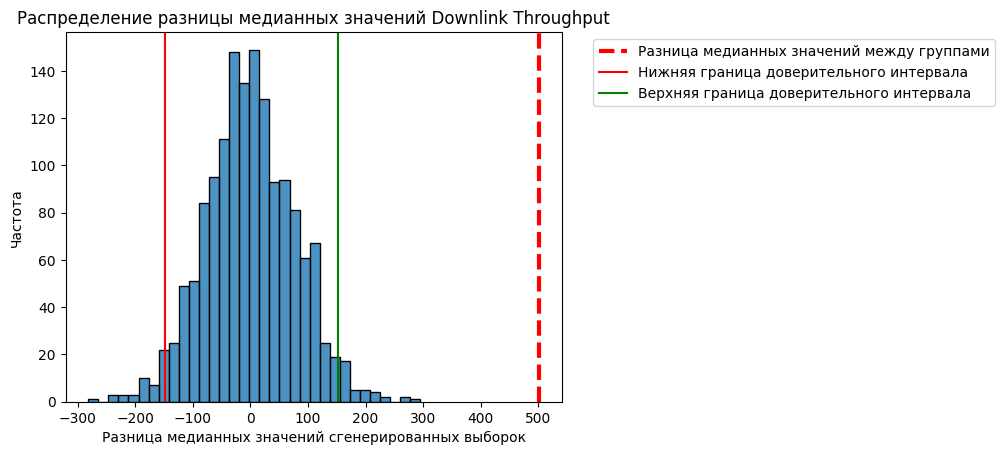

In [51]:
sns.histplot(x=differences_cent, alpha=0.8)
plt.axvline(diff, color='red',
            linestyle='dashed', linewidth=3, label='Разница медианных значений между группами')
plt.axvline(np.percentile(differences_cent, 2.5), linestyle='-', color='r', label='Нижняя граница доверительного интервала')
plt.axvline(np.percentile(differences_cent, 97.5), linestyle='-', color='g', label='Верхняя граница доверительного интервала')
plt.xlabel('Разница медианных значений сгенерированных выборок')
plt.ylabel('Частота')
plt.title('Распределение разницы медианных значений Downlink Throughput')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*Значение рассчитанного p-value меньше установленной степени значимости 0,05, поэтому можно утверждать, что при текущих данных и заданной степени значимости оценка качества связи клиентом Q1 зависит от технического параметра Downlink Throughput. Клиенты с большей скоростью Downlink Throughput больше довольны качеством связи, чем клиенты с меньшей скоростью Downlink Throughput*

*Проведем аналогичные рассчеты для всех параметров и составим выводы*

In [151]:
# Применим функцию к столбцам
for feature in feature_columns:
    _, _ = bootstrap(df, feature)

------------------------------
Разница в медианных значениях Total Traffic(MB) при разных значениях Q1 равна 1.011
P_value: 0.46
Нулевую гипотезу при заданной степени значимости отвергнать нельзя.
Различия статистически НЕ значимы!
------------------------------
Разница в медианных значениях Downlink Throughput(Kbps) при разных значениях Q1 равна 501.15
P_value: 0.0
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------------------------
Разница в медианных значениях Uplink Throughput(Kbps) при разных значениях Q1 равна 11.535
P_value: 0.026
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------------------------
Разница в медианных значениях Downlink TCP Retransmission Rate(%) при разных значениях Q1 равна 0.3
P_value: 0.0
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------------------------
Разница в медианных зн

### Раздел 2.4 Выводы

На основе разведочного анализа данных и результатов статистической проверки можно сделать следующие выводы:
* На оценку качества связи положительно влияют следующие технические параметры:
    1) Downlink Throughput
    2) Video Streaming Download Throughput
    3) Web Page Download Throughput
    4) Uplink Throughput  
    
    **Увеличивая данные параметры компания может рассчитывать на улучшение удовлетворенности клиентами качеством связи.**  
* На оценку качества связи отрицательно влияют следующие технические параметры:
    1) Downlink TCP Retransmission Rate
    2) Web Average TCP RTT
    3) Video Streaming xKB Start Delay

    **Уменьшая данные параметры компания может рассчитывать на улучшение удовлетворенности клиентами качеством связи.**  
* Total Traffic не оказывает влияния на оценку связи клиентом

Дополнительно стоит отметить, что улучшение одного из такхих технических параметров, как Video Streaming Download Throughput, Downlink Throughput, Web Page Download Throughput и Video Streaming xKB Start Delay, может позволить улучшить другой параметр из этого перечисления, т.к. данные параметры обладают умеренной и значительной корреляционной связью.

## Раздел 3. Исследование зависимости причин неудовлетворенности качеством связи (ответа на второй вопрос опроса) от технических показателей

### 3.1 Постановка задачи

Второй вопрос опроса определял причины неудовлетворенности качеством связи, предлагая кленту выбрать вариант из 7 ответов. Логично предположить, что причины неудовлетворенности качеством связи будут зависить от технических параметров связи. Однако технические параметры, предоставленные компанией, содержат только данные, касающиеся мобильного интернета. Таким образом можно предположить, что технические данные будут влиять только на варианты ответов 3, 4, 5. Проведем разведочный анализ данных для того, чтобы выяснить, от каких технических показателей зависит ответ на второй вопрос, в какой степени и какая причина неудовлетворенности качеством связи является доминирующей.

Варианты ответов клиентов:
* 1 - Недозвоны, обрывы при звонках
* 2 - Время ожидания гудков при звонке
* 3 - Плохое качество связи в зданиях, торговых центрах и т.п.
* 4 - Медленный мобильный интернет
* 5 - Медленная загрузка видео
* 6 - Затрудняюсь ответить
* 7 - Свой вариант
* 8 - Клиент не оставил ответа или ответил некорректно (вариант, дополненный при анализе данных)

### 3.2 Разведочный анализ данных

In [152]:
# Выберем для анализа только те записи, в которых клиенты давали ответ на второй вопрос опроса
df2 = df[~df['Q1'].isin([9, 10])]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1974 entries, 1 to 3112
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         1974 non-null   int32  
 1   Q2                                         1974 non-null   object 
 2   Total Traffic(MB)                          1974 non-null   float64
 3   Downlink Throughput(Kbps)                  1974 non-null   float64
 4   Uplink Throughput(Kbps)                    1974 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        1974 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  1974 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        1974 non-null   int64  
 8   Web Page Download Throughput(Kbps)         1974 non-null   float64
 9   Web Average TCP RTT(ms)                    1974 non-null   int64  
 10  q2_1                         

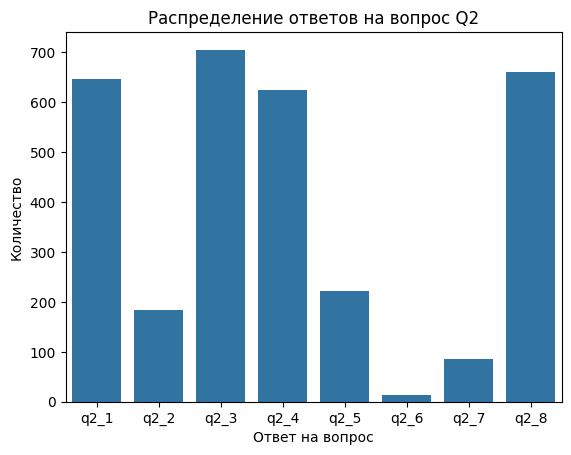

In [153]:
# Посмотрим, как часто клиенты выбирали тот или иной вариант ответа
sns.barplot(df2[df2.columns[10:18]].sum())
plt.title('Распределение ответов на вопрос Q2')
plt.xlabel('Ответ на вопрос')
plt.ylabel('Количество')
plt.show()

*Так как клиент мог выбрать несколько ответов, сумма долей больше 1*  
*Можно сделать вывод, что клиенты практически одинаково часто выбирали ответы 1, 3, 4 или не отвечали на вопрос, реже - 2, 5, и совсем редко - 6, 7*

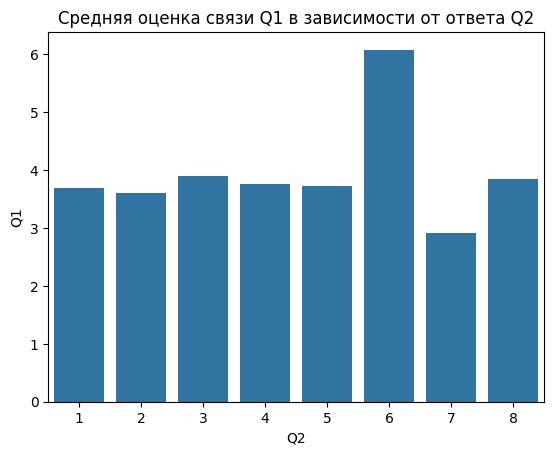

In [154]:
# Рассмотрим среднюю оценку Q1 в зависимости от ответа Q2
temp = df2['Q2'].explode().reset_index()
temp = temp.merge(df['Q1'], left_on='user_id', right_on=df.index, how='left')
temp = temp.pivot_table(index='Q2', values='Q1')
sns.barplot(temp, x=temp.index, y='Q1')
plt.title('Средняя оценка связи Q1 в зависимости от ответа Q2')
plt.show()

*Средняя оценка для всех ответов кроме 6 и 7 одинаковая, приблизительно 3,75. У ответа 7 оценка немного ниже - почти 3 балла, у ответа 6 выше - 6 баллов, но такие ответы выбирали клиенты редко, поэтому данные по этим ответам не показательны*

*Рассчитаем медианные значения технических параметров для разных вариантов ответа, кроме ответов 6 и 7. Для этих вариантов совсем мало данных*

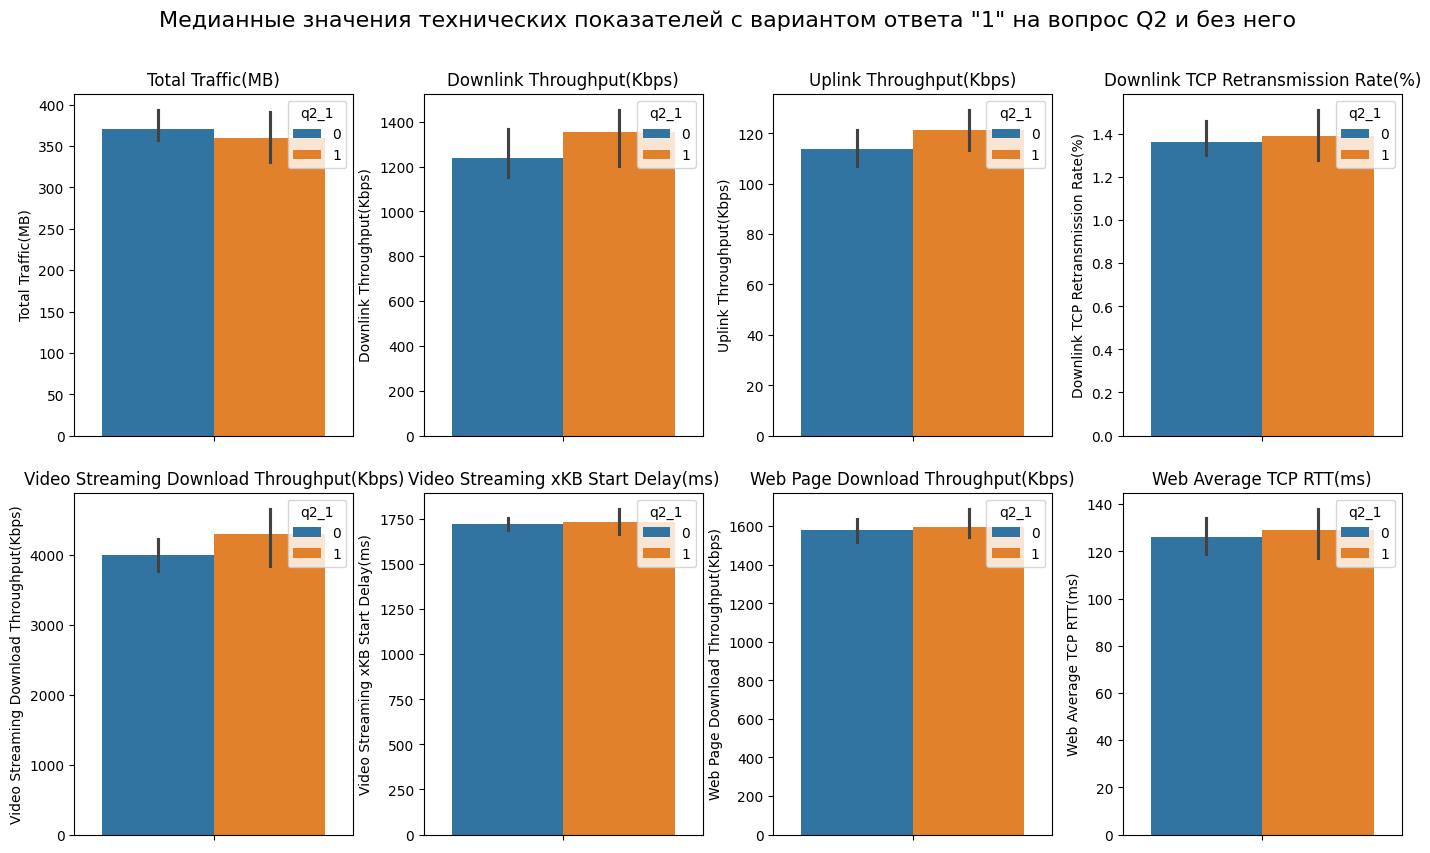

In [155]:
# Q2 - "1"
fig, axes = plt.subplots(2, 4, figsize=(14,8))
fig.tight_layout(w_pad=2, h_pad=2)
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.barplot(df2, y=col, hue='q2_1', estimator='median', ax=axes[i])
    axes[i].set_title(f'{col}')
fig.suptitle('Медианные значения технических показателей с вариантом ответа "1" на вопрос Q2 и без него', fontsize=16, y=1.08)
plt.show()

*Сильного различия в медианных значениях не наблюдается, что логично: вариант ответа 1 связан с телефонными звонками, а не интернетом*

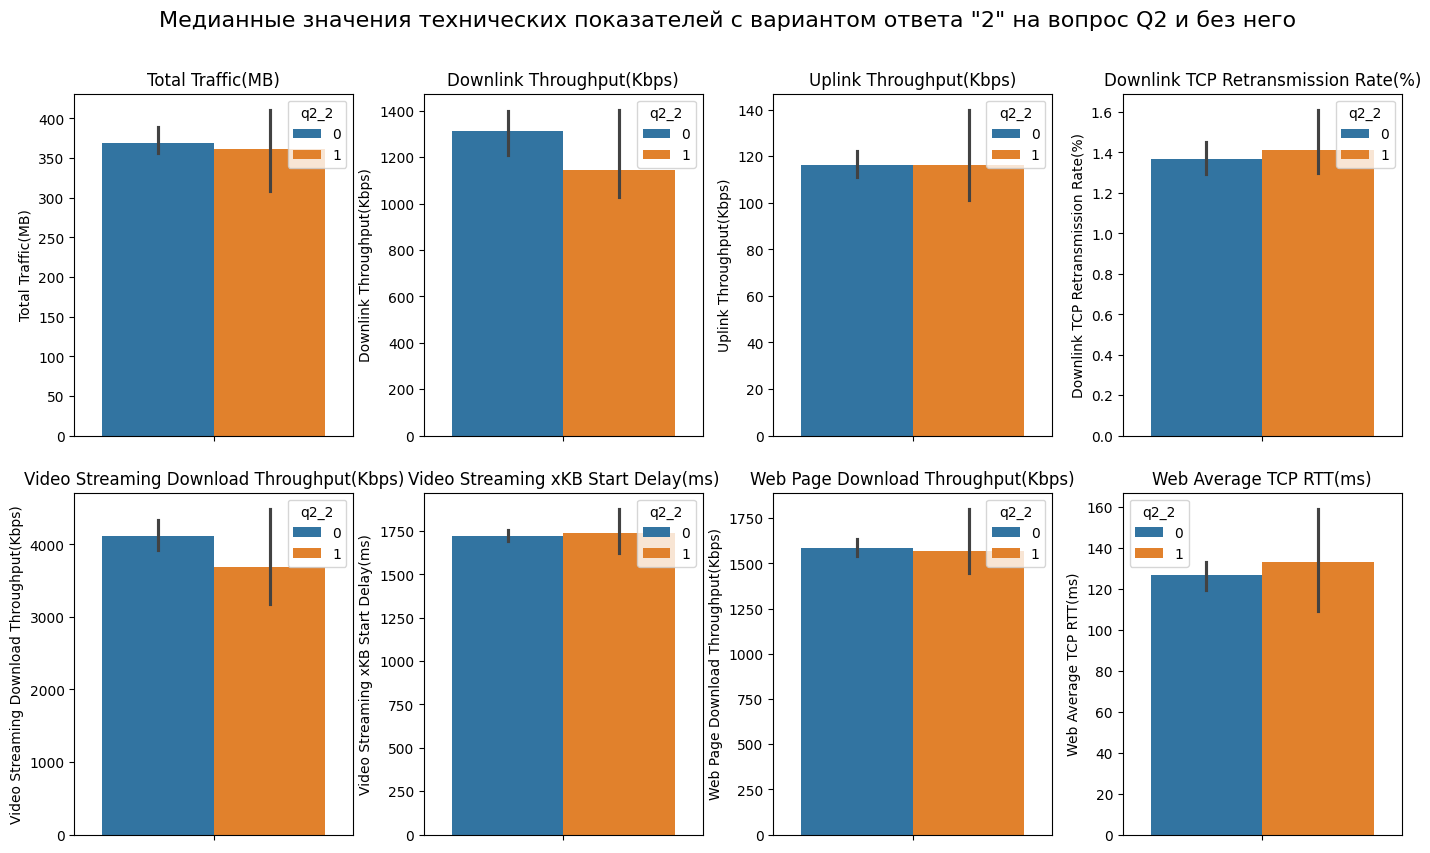

In [156]:
# Q2 - "2"
fig, axes = plt.subplots(2, 4, figsize=(14,8))
fig.tight_layout(w_pad=2, h_pad=2)
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.barplot(df2, y=col, hue='q2_2', estimator='median', ax=axes[i])
    axes[i].set_title(f'{col}')
fig.suptitle('Медианные значения технических показателей с вариантом ответа "2" на вопрос Q2 и без него', fontsize=16, y=1.08)
plt.show()

*Наблюдаются различия в медианных значениях Downlink Throughput и Video Streaming Download Throughput, но планки погрешностей перекрываются, что говорит о большом разбросе или недостаточном количестве данных (этот вариант выбирали ~ 200 раз из 2000). Поэтому различия в этих показателях неподтверждены*

In [157]:
# Q2 - "3"
fig, axes = plt.subplots(2, 4, figsize=(14,8))
fig.tight_layout(w_pad=2, h_pad=2)
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.barplot(df2, y=col, hue='q2_3', estimator='median', ax=axes[i])
    axes[i].set_title(f'{col}')
fig.suptitle('Медианные значения технических показателей с вариантом ответа "3" на вопрос Q2 и без него', fontsize=16, y=1.08)
plt.show()

*Как и с вариантом ответа "1" различия в медианных значениях не наблюдается*

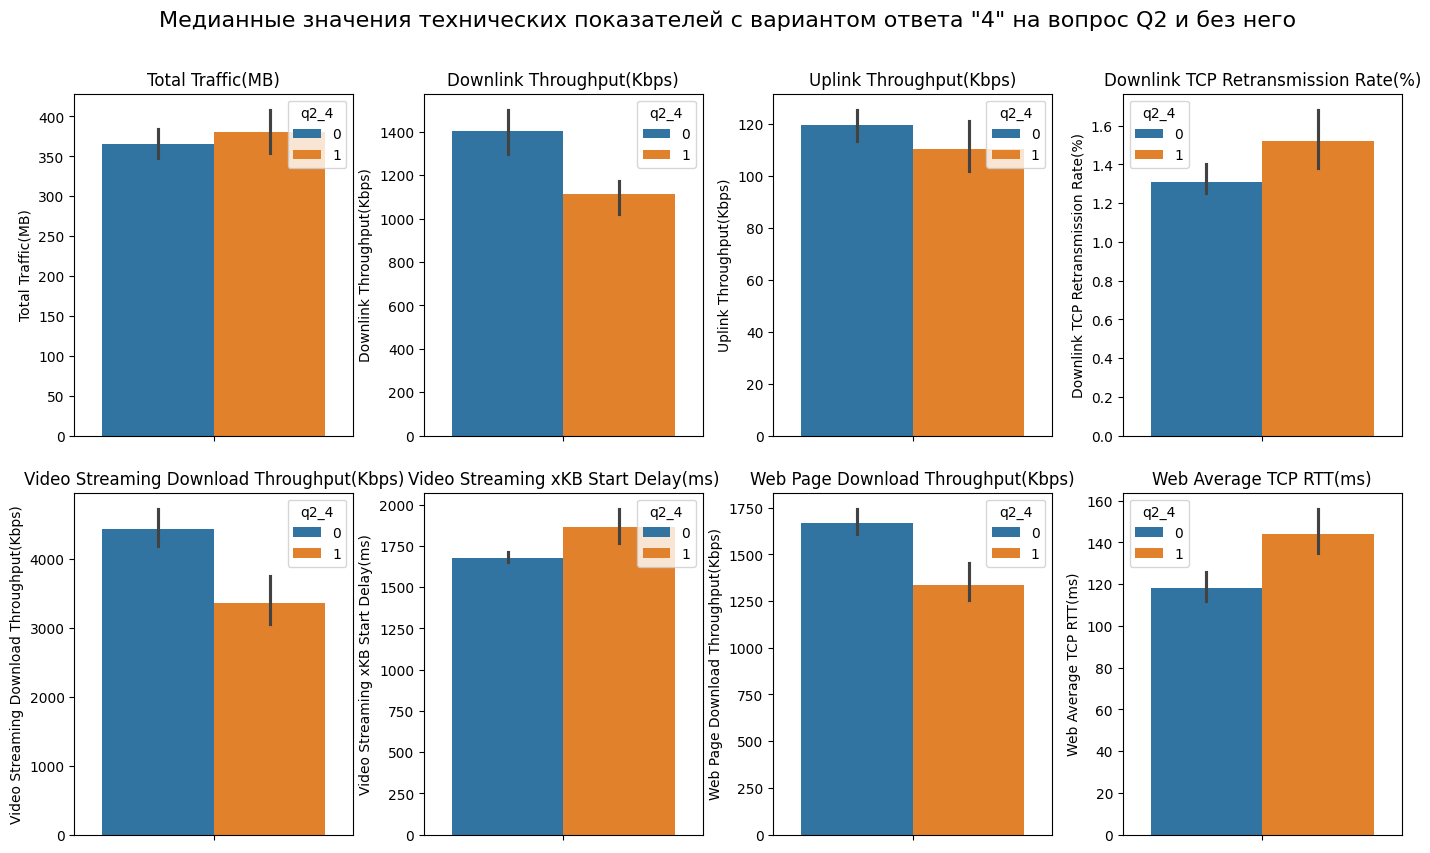

In [158]:
# Q2 - "4"
fig, axes = plt.subplots(2, 4, figsize=(14,8))
fig.tight_layout(w_pad=2, h_pad=2)
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.barplot(df2, y=col, hue='q2_4', estimator='median', ax=axes[i])
    axes[i].set_title(f'{col}')
fig.suptitle('Медианные значения технических показателей с вариантом ответа "4" на вопрос Q2 и без него', fontsize=16, y=1.08)
plt.show()

*У клиентом, ответивших на вопрос Q2 - "4", все технические параметры, кроме Total Traffic, хуже, чем у тех, кто отвечал на вопрос Q2 иначе. Вариант "4" напрямую связан с интернетом (жалоба на медленный мобильный интернет), что подтверждает нашу гипотезу*

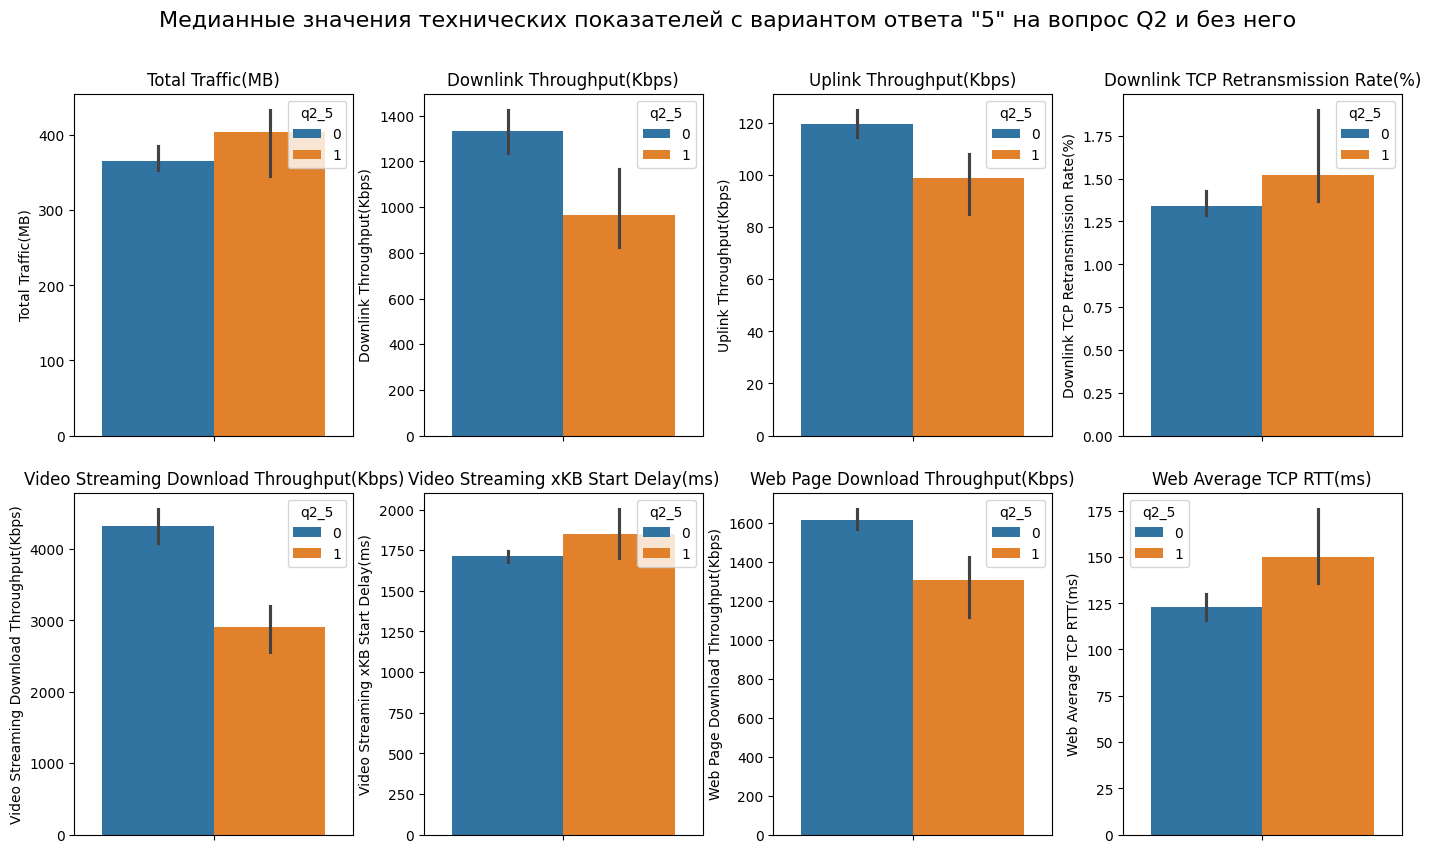

In [159]:
# Q2 - "5"
fig, axes = plt.subplots(2, 4, figsize=(14,8))
fig.tight_layout(w_pad=2, h_pad=2)
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.barplot(df2, y=col, hue='q2_5', estimator='median', ax=axes[i])
    axes[i].set_title(f'{col}')
fig.suptitle('Медианные значения технических показателей с вариантом ответа "5" на вопрос Q2 и без него', fontsize=16, y=1.08)
plt.show()

*Графики совпадают с вариантом "4", при этом более выражено различие в параметре Video Streaming Download Throughput (вариант ответа "5" - медленная загрузка видео). Планки погрешностей у некоторых параметров больше в связи с небольшим объемом данных, но не перекрываются или почти не перекрываются у большинства параметров*

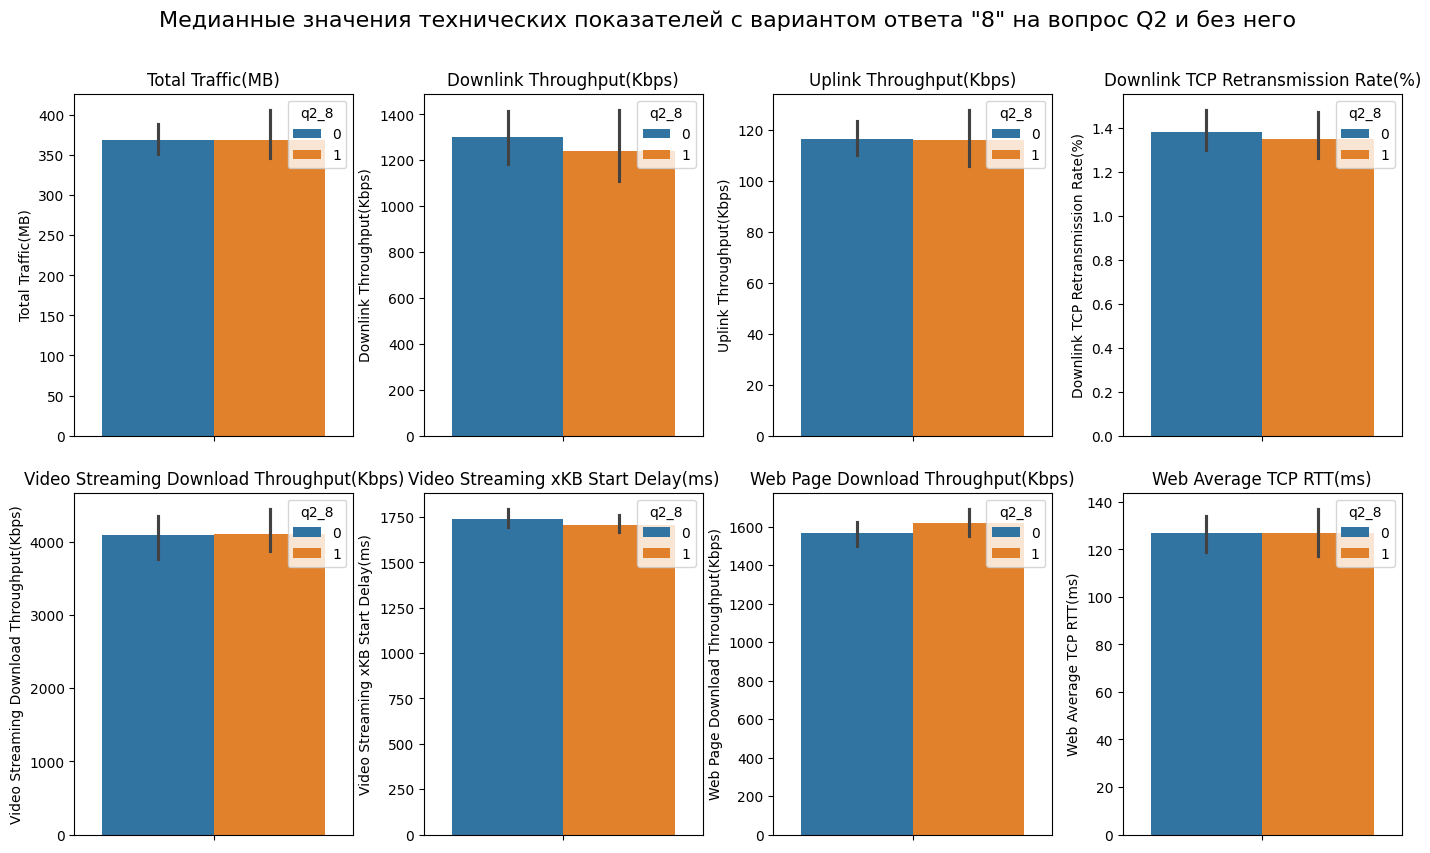

In [160]:
# Q2 - "8"
fig, axes = plt.subplots(2, 4, figsize=(14,8))
fig.tight_layout(w_pad=2, h_pad=2)
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.barplot(df2, y=col, hue='q2_8', estimator='median', ax=axes[i])
    axes[i].set_title(f'{col}')
fig.suptitle('Медианные значения технических показателей с вариантом ответа "8" на вопрос Q2 и без него', fontsize=16, y=1.08)
plt.show()

*Различия в медианных значениях не наблюдается*

In [161]:
# Так как случаев ответа 5 на вопрос Q2 было не много, узнаем, как часто люди выбирали ответ 5 без ответа 4, чтобы узнать независимость графиков
len(df2.query('q2_5 == 1 & q2_4 == 0')) / len(df2.query('q2_5 == 1 & q2_4 == 1'))

0.1945945945945946

*Только у 20 % клиентов, которые выбирали ответ Q2 - 5 не выбирали дополнительно ответ Q2 - 4. Это значит, что большая часть клиентов, которых мы анализировали по ответу Q2 - 5, уже есть в анализе по ответу Q2 - 4*

In [162]:
# Выясним какая доля клиентов из всех недовольных качеством связи (ответы 1 - 8 на вопрос Q1) были недовольны качеством интернета (ответы 4, 5 на вопрос Q2)
len(df2.query('q2_4 == 1 | q2_5 == 1')) / len(df2)

0.33485309017223913

*Треть всех недовольных качеством связи клиентов недовольны мобильным интернетом (ответы 4 и 5)*

#### Вывод
Разведочный анализ данных позволяет предположить, что:
* Варианты ответов 1 (Недозвоны, обрывы при звонках), 2 (Время ожидания гудков при звонке), 3 (Плохое качество связи в зданиях, торговых центрах и т.п.) или когда клиент не оставил ответа не зависят от технических параметров;
* Варианты ответов 4 (Медленный мобильный интернет), 5 (Медленная загрузка видео) зависят от всех технических параметров, кроме Total Traffic;
* Для анализа вариантов ответа 6 (Затрудняюсь ответить), 7 (Свой вариант) недостаточно данных;
* Влияние технических параметров на общую оценку связи (ответ на вопрос Q1) - результат влияния технических показателей на удовлетворенность клиентами качеством мобильного интернета (33 % от всех недовольных)

### 3.3 Статистическая проверка зависимости

Для статистической проверки зависимости ответа на второй вопрос опроса от технических параметров будем использовать метод бутстрапа. Каждый вариант ответа рассмотрим отдельно. Мы разделим клиентов на две группы: тех, кто оставил данный вариант ответа на вопрос Q2, и тех, кто не оставил. Затем мы сравним медианное значение технических параметров этих групп и статистически проверим значимость разницы. На основе разведочного анализа данных, проверять различия будем для вариантов ответа 4 и 5.

Составим нулевую гипотезу для варианта ответа "4" и технического параметра Downlink Throughput:  
**H0 - жалоба клиента на медленный мобильный интернет не зависит от технического параметра Downlink Throughput**  

И соответствующую ей правостороннюю альтернативную гипотезу:  
**H1 - у клиентов, которые жаловались на скорость мобильного интернета, медианное значение технического параметра Downlink Throughput ниже**


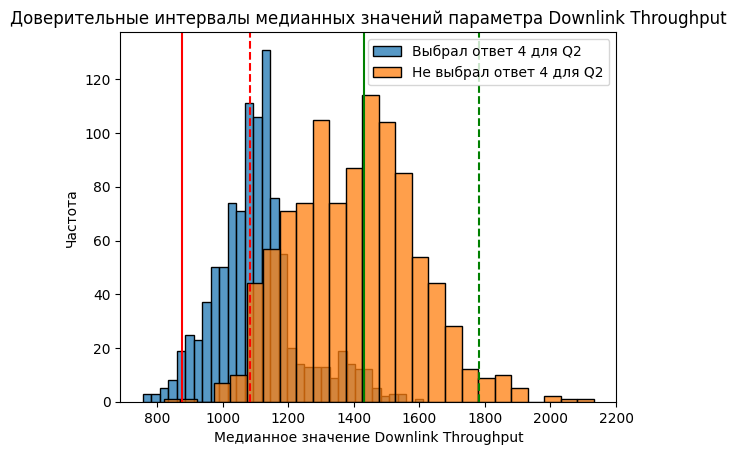

In [163]:
# Построим бустрап распределение двух групп и посмотрим пересечение доверительных интервалов
sample_a = bootstrap_generator(df2.query('q2_4 == 1')['Downlink Throughput(Kbps)'])
sample_b = bootstrap_generator(df2.query('q2_4 == 0')['Downlink Throughput(Kbps)'])

sns.histplot(sample_a, label='Выбрал ответ 4 для Q2')
sns.histplot(sample_b, label='Не выбрал ответ 4 для Q2')
plt.axvline(np.percentile(sample_a, 2.5), linestyle='-', color='r')
plt.axvline(np.percentile(sample_a, 97.5), linestyle='-', color='g')
plt.axvline(np.percentile(sample_b, 2.5), linestyle='--', color='r')
plt.axvline(np.percentile(sample_b, 97.5), linestyle='--', color='g')
plt.title('Доверительные интервалы медианных значений параметра Downlink Throughput')
plt.xlabel('Медианное значение Downlink Throughput')
plt.ylabel('Частота')
plt.legend()
plt.show()

*Доверительные интервалы пересекаются, для дальнейшей оценки рассчитаем с помощью метода бустрап значение p-value*

In [164]:
# Напишем функцию, позволяющую быстро применять метод бутстрапа к разным столбцам
def bootstrap_q2(data, parameter, q2, p=0.05):
    ''' data: датафрейм, parameter: исследуемый столбец, q2: исследуемый вариант ответа на вопрос Q2, p: установленная степень значимости'''

    first_group = data[data[q2] == 0][parameter]
    second_group = data[data[q2] == 1][parameter]
    diff = second_group.median() - first_group.median()

    if diff < 0: # определяем правосторонняя или левосторонняя альтернативная гипотеза
        first_group, second_group = second_group, first_group
        diff = second_group.median() - first_group.median()

    k = len(first_group)
    l = len(second_group)
    n = 1500
    random.seed(13)
    differences = np.zeros(n)
    for i in range(n):
        s1 = random.choices(first_group.tolist(), k=k)
        s2 = random.choices(second_group.tolist(), k=l)
        p1 = np.median(s1)
        p2 = np.median(s2)
        differences[i] = p2 - p1
    differences_cent = differences - np.mean(differences)
    p_value = sum(differences_cent >= diff) / n

    print('------------------------------')
    print(f'Разница в медианных значениях {parameter} между группами для {q2} равна {round(diff, 3)}')
    print(f'P_value: {p_value}')
    if p_value <= p:
        print('Нулевую гипотезу при заданной степени значимости можно отвергнуть.')
        print('Различия статистически значимы!')
    else:
        print('Нулевую гипотезу при заданной степени значимости отвергнать нельзя.')
        print('Различия статистически НЕ значимы!')
    return differences_cent, diff

In [165]:
# Применим уже функцию
differences_cent, diff = bootstrap_q2(df2, 'Downlink Throughput(Kbps)', 'q2_4')

------------------------------
Разница в медианных значениях Downlink Throughput(Kbps) между группами для q2_4 равна 293.05
P_value: 0.0
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!


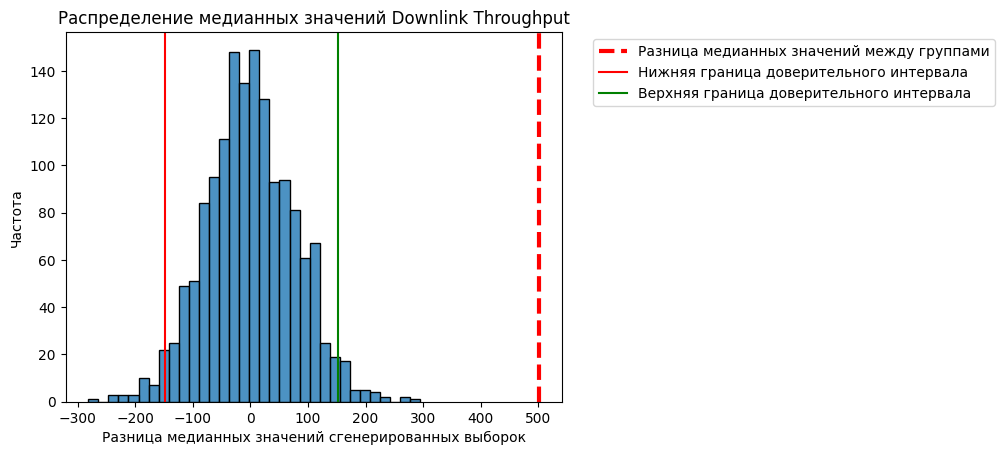

In [52]:
sns.histplot(x=differences_cent, alpha=0.8)
plt.axvline(diff, color='red',
            linestyle='dashed', linewidth=3, label='Разница медианных значений между группами')
plt.axvline(np.percentile(differences_cent, 2.5), linestyle='-', color='r', label='Нижняя граница доверительного интервала')
plt.axvline(np.percentile(differences_cent, 97.5), linestyle='-', color='g', label='Верхняя граница доверительного интервала')
plt.xlabel('Разница медианных значений сгенерированных выборок')
plt.ylabel('Частота')
plt.title('Распределение медианных значений Downlink Throughput')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*Значение рассчитанного p-value меньше установленной степени значимости 0,05, поэтому можно утверждать, что при текущих данных и заданной степени значимости удовлетворенность скоростью мобильного интернета клиента зависит от технического параметра Downlink Throughput. У клиентов, которые жаловались на низкую скорость мобильного интернета, технический параметр Downlink Throughput ниже, чем у тех, кто не жаловался*

*Проведем аналогичные рассчеты для всех параметров и составим выводы*

In [167]:
# для Q2 - "4"
for feature in feature_columns[1:]:
    _, _ = bootstrap_q2(df2, feature, 'q2_4')

------------------------------
Разница в медианных значениях Downlink Throughput(Kbps) между группами для q2_4 равна 293.05
P_value: 0.0
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------------------------
Разница в медианных значениях Uplink Throughput(Kbps) между группами для q2_4 равна 9.25
P_value: 0.052
Нулевую гипотезу при заданной степени значимости отвергнать нельзя.
Различия статистически НЕ значимы!
------------------------------
Разница в медианных значениях Downlink TCP Retransmission Rate(%) между группами для q2_4 равна 0.21
P_value: 0.007333333333333333
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------------------------
Разница в медианных значениях Video Streaming Download Throughput(Kbps) между группами для q2_4 равна 1072.26
P_value: 0.0
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------

*Статистически не подтвердилась зависимость медианного значения параметра Uplink Throughput от варианта 4 при ответе на вопрос Q2*

In [168]:
# для Q2 - "5"
for feature in feature_columns[1:]:
    _, _ = bootstrap_q2(df2, feature, 'q2_5')

------------------------------
Разница в медианных значениях Downlink Throughput(Kbps) между группами для q2_5 равна 368.21
P_value: 0.0006666666666666666
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------------------------
Разница в медианных значениях Uplink Throughput(Kbps) между группами для q2_5 равна 20.69
P_value: 0.0006666666666666666
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------------------------
Разница в медианных значениях Downlink TCP Retransmission Rate(%) между группами для q2_5 равна 0.18
P_value: 0.186
Нулевую гипотезу при заданной степени значимости отвергнать нельзя.
Различия статистически НЕ значимы!
------------------------------
Разница в медианных значениях Video Streaming Download Throughput(Kbps) между группами для q2_5 равна 1413.19
P_value: 0.0
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически з

*Статистически не подтвердилась зависимость медианного значения параметра Downlink TCP Retransmission Rate от варианта 5 при ответе на вопрос Q2*

In [169]:
# Проверим, что для Q2 - "1" различия статистически не значимы
for feature in feature_columns[1:]:
    _, _ = bootstrap_q2(df2, feature, 'q2_1')

------------------------------
Разница в медианных значениях Downlink Throughput(Kbps) между группами для q2_1 равна 116.2
P_value: 0.08133333333333333
Нулевую гипотезу при заданной степени значимости отвергнать нельзя.
Различия статистически НЕ значимы!
------------------------------
Разница в медианных значениях Uplink Throughput(Kbps) между группами для q2_1 равна 7.51
P_value: 0.07466666666666667
Нулевую гипотезу при заданной степени значимости отвергнать нельзя.
Различия статистически НЕ значимы!
------------------------------
Разница в медианных значениях Downlink TCP Retransmission Rate(%) между группами для q2_1 равна 0.03
P_value: 0.3293333333333333
Нулевую гипотезу при заданной степени значимости отвергнать нельзя.
Различия статистически НЕ значимы!
------------------------------
Разница в медианных значениях Video Streaming Download Throughput(Kbps) между группами для q2_1 равна 298.49
P_value: 0.088
Нулевую гипотезу при заданной степени значимости отвергнать нельзя.
Различи

In [170]:
# Также проверим, что для Q2 - "2" (наблюдались различия в медианных значениях Downlink Throughput и Video Streaming Download Throughput)
_, _ = bootstrap_q2(df2, 'Downlink Throughput(Kbps)', 'q2_2')
_, _ = bootstrap_q2(df2, 'Video Streaming Download Throughput(Kbps)', 'q2_2')

------------------------------
Разница в медианных значениях Downlink Throughput(Kbps) между группами для q2_2 равна 165.79
P_value: 0.024
Нулевую гипотезу при заданной степени значимости можно отвергнуть.
Различия статистически значимы!
------------------------------
Разница в медианных значениях Video Streaming Download Throughput(Kbps) между группами для q2_2 равна 426.34
P_value: 0.14133333333333334
Нулевую гипотезу при заданной степени значимости отвергнать нельзя.
Различия статистически НЕ значимы!


*Статистически не подтвердилась зависимость медианного значения параметра Video Streaming Download Throughput от варианта 2 при ответе на вопрос Q2*

*Все наши предположения подтвердились*

### Раздел 3.4 Выводы

На основе разведочного анализа данных и результатов статистической проверки можно сделать следующие выводы:
* Клиенты чаще всего не удовлетворены: 
    1) Недозвоны, обрывы при звонках
    2) Плохое качество связи в зданиях, торговых центрах и т.п.
    3) Медленный мобильный интернет
* Довольно часто клиент не оставлял ответ на вопрос Q2 или оставлял его некорректно
* Клиенты реже всего отвечали на вопрос Q2:
    1) Затрудняюсь ответить
    2) Свой вариант
* Недовольство клиентами качеством звонков (ответы 1, 2, 3) не зависят от технических параметров
* Недовольство клиентами качеством мобильного интернета (ответы 4, 5) зависят от технических параметров, кроме параметра Total Traffic  
    **Увеличивая данные параметры компания может рассчитывать на улучшение удовлетворенности клиентами качеством мобильного интернета.** 
* Для анализа вариантов ответа 6 (Затрудняюсь ответить), 7 (Свой вариант) недостаточно данных

## Раздел 4. Заключение

На основании разведочного анализа всех предоставленных данных и последующих проверок статистической значимости можно сделать следущие выводы:
* 35 % клиентов удовлетворены качеством связи (9 и 10 ответы на вопрос Q1)
* Удовлетворенность клиентами качеством связи в целом (ответ на вопрос Q1) зависит от всех собранных технических параметров, кроме параметра **Total Traffic**
* Средняя оценка клиентом качества связи в зависимости от ответа на вопрос Q2 в целом одинаковая
* Клиенты чаще всего неудовлетворены (ответ на вопрос Q2):
    * недозвонами, обрывами при звонках (ответ 1); 
    * плохим качеством связи в зданиях, торговых центрах и т.п. (ответ 3);
    * скоростью мобильного интернета (ответ 4).
* Реже клиенты выбирали следующие причины неудовлетворенности связью:
    * время ожидания гудков при звонке (ответ 2);
    * медленная загрузка видео (ответ 5).
* Клиенты редко выбирали ответы на вопрос Q2 затрудняюсь ответить (ответ 6) и свой вариант (ответ 7)
* Клиенты часто не отвечали на вопрос Q2 или отвечали некорректно
* Собранные технические параметры влияют только неудовлетворенность клиентами мобильным интернетом (ответы 4 и 5), но не звонками и качеством связи в помещениях (ответы 1, 2, 3)
* Доля клиентов, неудовлетворенных качеством интернета (ответы 4 и 5) относительно всех недовольных клиентов - 33 %
* Увеличивая технические параметры клиентов **Downlink Throughput, Video Streaming Download Throughput, Web Page Download Throughput, Uplink Throughput** компания может рассчитывать на улучшение удовлетворенности клиентом скоростью интернета и, вследствии чего, качеством связи в целом
* Уменьшая технические параметры клиентов **Downlink TCP Retransmission Rate, Web Average TCP RTT, Video Streaming xKB Start Delay** компания также может рассчитывать на улучшение  удовлетворенности клиентом скоростью интернета и, вследствии чего, качеством связи в целом
* **Uplink Throughput** чуть меньше влияет на удовлетворенность клиентом скоростью мобильного интернета
* Существует умеренная и значительная корреляционная связь между техническими показателями **Video Streaming Download Throughput, Downlink Throughput, Web Page Download Throughput и Video Streaming xKB Start Delay**

Рекомендации для компании:
* Для увеличения удовлетворенности качеством мобильного интернета рекомендуется в первую очередь улучшить технические параметры клиентов **Video Streaming Download Throughput, Downlink Throughput, Web Page Download Throughput и Video Streaming xKB Start Delay**. Это позволит улучшить удовлетворенность 33 % всех недовольных клиентов
* Для анализа причин неудовлетворенности качеством звонков и связи в помещениях необходимо собрать дополнительные данные, связанные непосредственно со звонками, а не мобильным интернетом
* В опросе рекомендуется исключить варианты "Свой вариант" (ответ 7), т.к. ни один пользователь не оставил никакого текстового сообщения и не указал свой вариант